In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/unsupervised-learning-on-country-data/Country-data.csv
/kaggle/input/unsupervised-learning-on-country-data/data-dictionary.csv


**Libraries**
In general i will load most of the required libraries "on the go" since i find it easier to read and repoduce when the library that is used is directly embedded into the current cell.

In [2]:
import matplotlib.pyplot as plt

# Motivation

I find this dataset very interesting since it provides us with the opportunity to analyse a dataset that is known to most of us and lets us reach a conlusion that is less abstract than working with other dataset. I find this important since dimensionality reduction is a very abstract technique and having a dataset that is clear and not abstract helps me to mitigate this to some extent. 


# About the data

This dataset was provided to kaggle in order to classify countries based on their public available key categories like gross domestic product etc. It has no labels and therefore is well suited for unsupervised learning tasks. 

# Import and inspect the data

In [3]:
# Read in the core dataset
data = pd.read_csv("/kaggle/input/unsupervised-learning-on-country-data/Country-data.csv")

print(data.head())

# read in the supplemental information on the variables
data_description = pd.read_csv("/kaggle/input/unsupervised-learning-on-country-data/data-dictionary.csv")

print(data_description.head())
print()
print("The variable names are: ", data_description["Column Name"])

               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200  
  Column Name                                        Description
0     country                                Name of the country
1  child_mort  Death of children under 5 years of age per 100...
2     exports  Exports of goods and services per capita. Give...
3      health  Total health spending 

Let us get some kexy information on the dataset and the variable types

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


As can be seen here we have 167 rows and in total 10 columns which specify the name of the countries and key characteristics.

# Data Visualisation and Cleaning

1. Find all missing values
2.  Visualise important variables

In [5]:
# 1. Missing values

print("There are in total", data.isnull().sum().sum(), "missing values in this dataset")

There are in total 0 missing values in this dataset


          country  child_mort
68        Iceland         2.6
91     Luxembourg         2.8
133     Singapore         2.8
32           Chad       150.0
132  Sierra Leone       160.0
66          Haiti       208.0


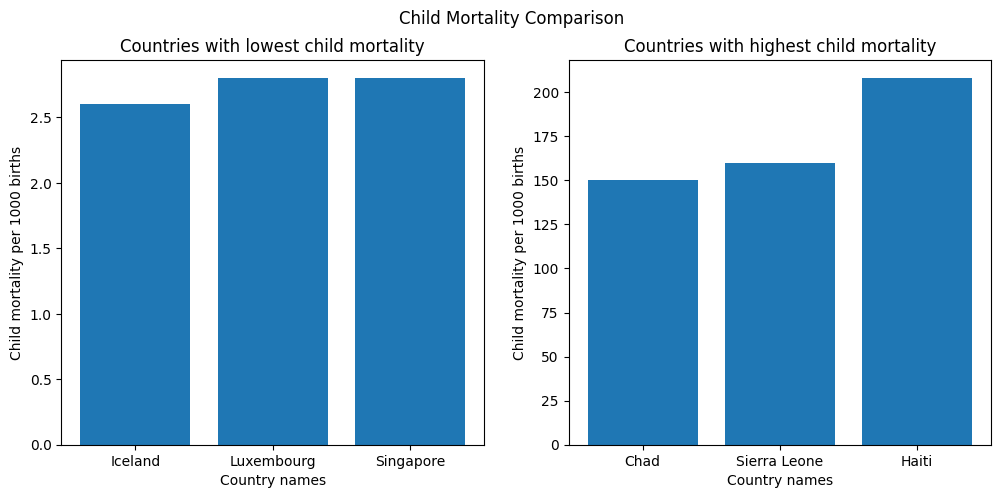

Death of children under 5 years of age per 1000 live births


In [6]:
# 2. Visualisation

# Countries with highest and lowest child mortality

child_mort_comp = data.sort_values(by = ["child_mort"]).loc[:,["country", "child_mort"]].iloc[[0,1,2,164,165,166],:]

print(child_mort_comp)

fig,axs = plt.subplots(1,2,figsize=(12, 5))

axs[0].bar(child_mort_comp.iloc[0:3,0], child_mort_comp.iloc[0:3,1])
axs[0].set_title("Countries with lowest child mortality")
axs[0].set_xlabel("Country names")
axs[0].set_ylabel("Child mortality per 1000 births")

axs[1].bar(child_mort_comp.iloc[3:6,0], child_mort_comp.iloc[3:6,1])
axs[1].set_title("Countries with highest child mortality")
axs[1].set_xlabel("Country names")
axs[1].set_ylabel("Child mortality per 1000 births")

fig.suptitle("Child Mortality Comparison")

plt.show()

print(data_description[data_description["Column Name"] == "child_mort"]["Description"].iloc[0])


              country  income
123             Qatar  125000
91         Luxembourg   91700
23             Brunei   80600
26            Burundi     764
88            Liberia     700
37   Congo, Dem. Rep.     609


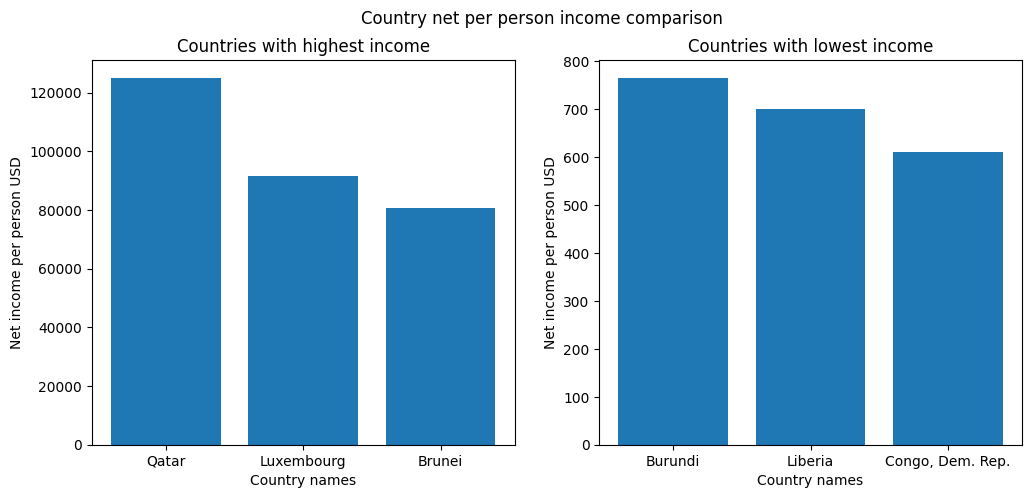

Net income per person


In [7]:
# Lowest and highes net income per person 

income_comp = data.sort_values(by = ["income"], ascending=False).loc[:,["country","income"]].iloc[[0,1,2,164,165,166],:]

print(income_comp)

fig,axs = plt.subplots(1,2,figsize=(12, 5))

axs[0].bar(income_comp.iloc[0:3,0], income_comp.iloc[0:3,1])
axs[0].set_title("Countries with highest income")
axs[0].set_xlabel("Country names")
axs[0].set_ylabel("Net income per person USD")

axs[1].bar(income_comp.iloc[3:6,0], income_comp.iloc[3:6,1])
axs[1].set_title("Countries with lowest income")
axs[1].set_xlabel("Country names")
axs[1].set_ylabel("Net income per person USD")

fig.suptitle("Country net per person income comparison")

plt.show()

print(data_description[data_description["Column Name"] == "Income"]["Description"].iloc[0])


                      country  life_expec
77                      Japan        82.8
133                 Singapore        82.7
145               Switzerland        82.2
31   Central African Republic        47.5
87                    Lesotho        46.5
66                      Haiti        32.1


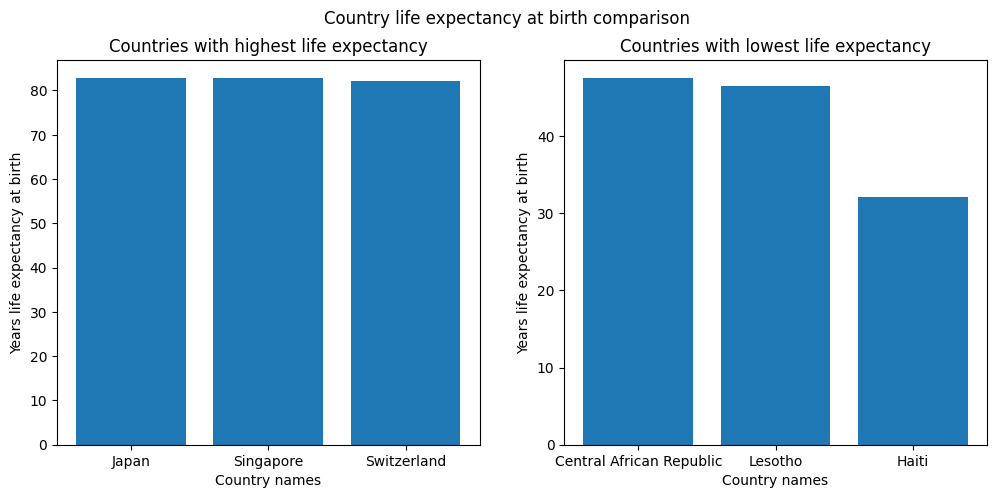

The average number of years a new born child would live if the current mortality patterns are to remain the same


In [8]:


# Lowest and highes life expectancy at birth

life_expec_comp = data.sort_values(by = ["life_expec"], ascending=False).loc[:,["country","life_expec"]].iloc[[0,1,2,164,165,166],:]

print(life_expec_comp)

fig,axs = plt.subplots(1,2,figsize=(12, 5))

axs[0].bar(life_expec_comp.iloc[0:3,0], life_expec_comp.iloc[0:3,1])
axs[0].set_title("Countries with highest life expectancy")
axs[0].set_xlabel("Country names")
axs[0].set_ylabel("Years life expectancy at birth")

axs[1].bar(life_expec_comp.iloc[3:6,0], life_expec_comp.iloc[3:6,1])
axs[1].set_title("Countries with lowest life expectancy")
axs[1].set_xlabel("Country names")
axs[1].set_ylabel("Years life expectancy at birth")

fig.suptitle("Country life expectancy at birth comparison")

plt.show()

print(data_description[data_description["Column Name"] == "life_expec"]["Description"].iloc[0])

              country    gdpp
91         Luxembourg  105000
114            Norway   87800
145       Switzerland   74600
37   Congo, Dem. Rep.     334
88            Liberia     327
26            Burundi     231


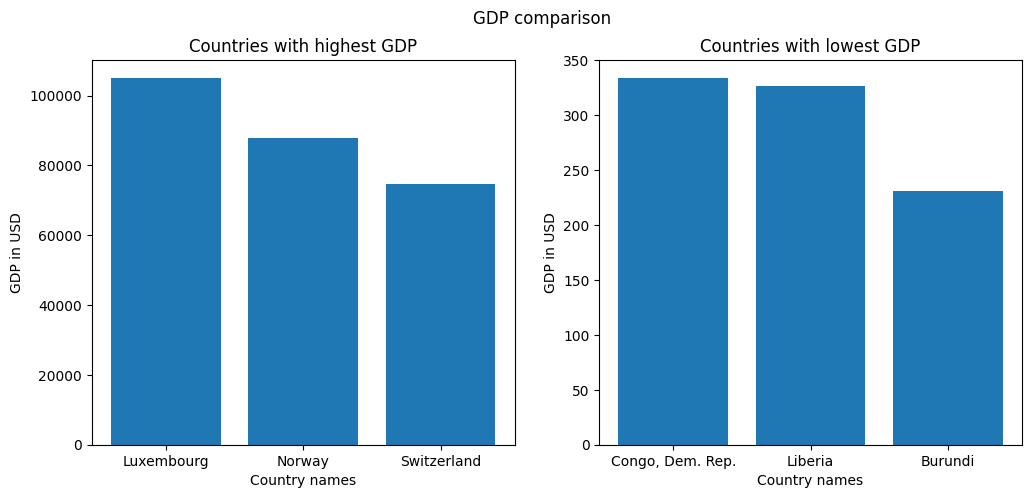

The GDP per capita. Calculated as the Total GDP divided by the total population.


In [9]:
gdpp_comp = data.sort_values(by = ["gdpp"], ascending=False).loc[:,["country","gdpp"]].iloc[[0,1,2,164,165,166],:]

print(gdpp_comp)

fig,axs = plt.subplots(1,2,figsize=(12, 5))

axs[0].bar(gdpp_comp.iloc[0:3,0], gdpp_comp.iloc[0:3,1])
axs[0].set_title("Countries with highest GDP")
axs[0].set_xlabel("Country names")
axs[0].set_ylabel("GDP in USD")

axs[1].bar(gdpp_comp.iloc[3:6,0], gdpp_comp.iloc[3:6,1])
axs[1].set_title("Countries with lowest GDP")
axs[1].set_xlabel("Country names")
axs[1].set_ylabel("GDP in USD")

fig.suptitle("GDP comparison")

plt.show()

print(data_description[data_description["Column Name"] == "gdpp"]["Description"].iloc[0])

Lets have another look at the variable. Are they correlated?

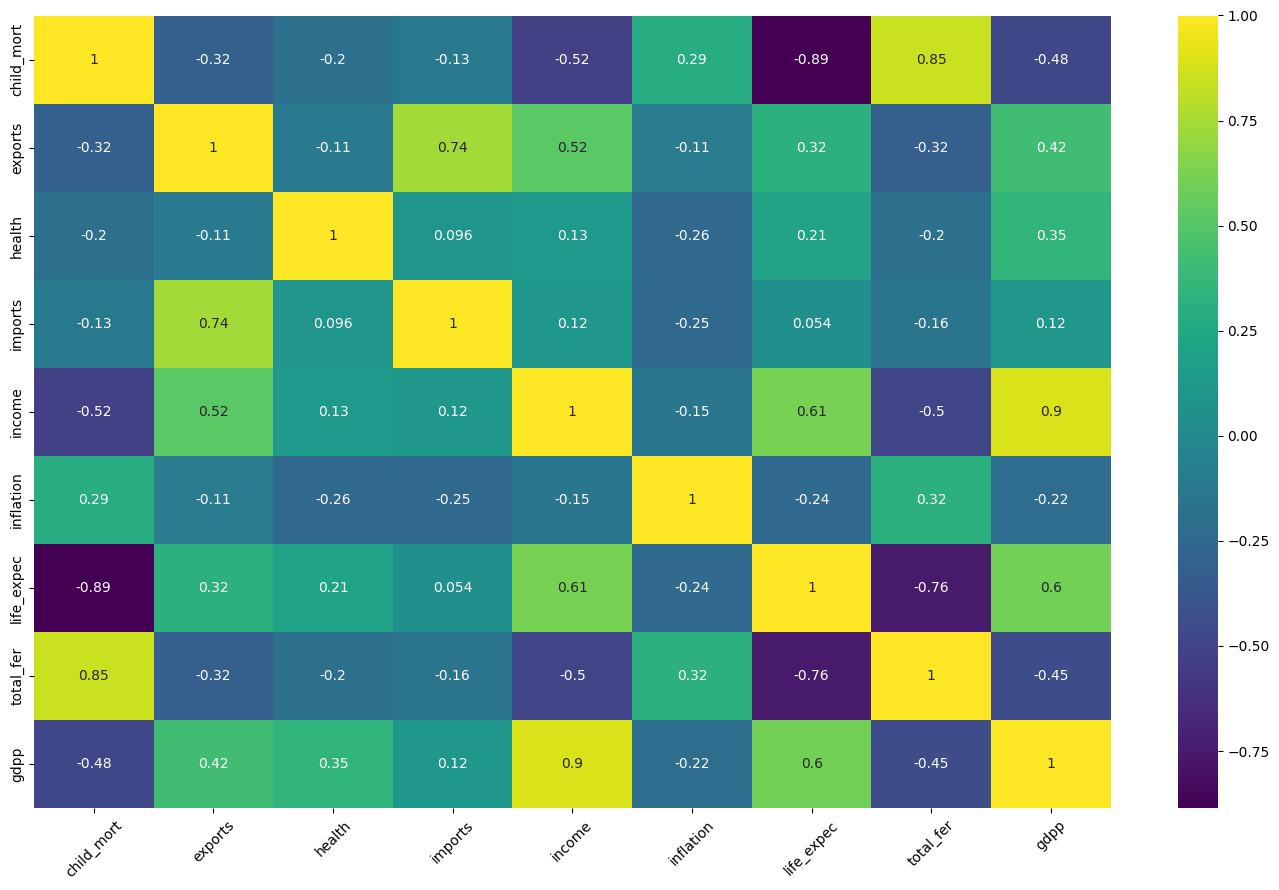

In [10]:
import seaborn as sns

plt.figure(figsize=(14, 9)) 
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="viridis") 
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

As can be seen in the upper graph some features are heavily correlated.
1. Net income is heavily (0.9) correlated with the GDP which makes sense since countries with a stringer economy can pay higher salaries to their population
2. life expectancy at birth is highly correlated with child mortality (0.89). This also makes sense since life expectancy is to some degree an extension of child mortality and both are markers for the respective healthcare system

# Scale the data

Many methods require scaling before performing analysis. I decided to use the MinMaxScaler which preserves the data's underlying distribution. Scaling in this dataset is essential since variable differ in magnitude due to the underlying difference in meaning (eg. GDP vs. mortality which may differ by a factor of 1000)

In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# remove country label
data_no_country = data.drop(columns = ["country"])

scaler = MinMaxScaler()

data_scaled = scaler.fit_transform(data_no_country)

print("The shape of the scaled dataset is:", data_scaled.shape)

The shape of the scaled dataset is: (167, 9)


# PCA

In [12]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(data_scaled)
explained_variance_ratio = pca.explained_variance_ratio_
print("The number of principal components are:", len(explained_variance_ratio))
print("The explained variance ration of the principal components are: ", explained_variance_ratio)

The number of principal components are: 9
The explained variance ration of the principal components are:  [0.55001227 0.13384784 0.12301053 0.09749047 0.03777964 0.03013659
 0.01190434 0.00887791 0.00694042]


Lets plot the cumulative sums of the explained variance ratios

The cumulative sums of the explained variance of the principal components are:  [0, 0.5500122655774043, 0.6838601025149815, 0.8068706316671052, 0.9043610971613386, 0.9421407334594115, 0.9722773243704952, 0.9841816612442866, 0.9930595759896889]


Text(0, 0.5, 'Cumulative sum of explained variance ratios')

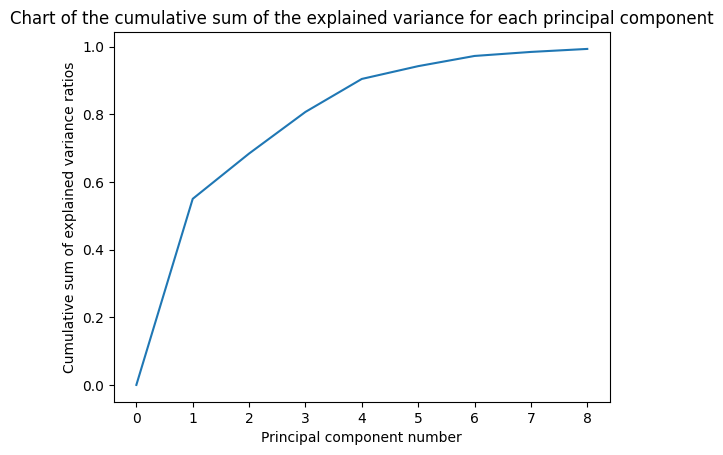

In [13]:
counter = explained_variance_ratio[0]

explained_variance_sum = [0]

for i in range(1,len(explained_variance_ratio)):
    explained_variance_sum.append(counter)
    counter += explained_variance_ratio[i]

number = range(len(explained_variance_ratio))

print("The cumulative sums of the explained variance of the principal components are: ", explained_variance_sum)

plt.plot(number, explained_variance_sum)
plt.title("Chart of the cumulative sum of the explained variance for each principal component")
plt.xlabel("Principal component number")
plt.ylabel("Cumulative sum of explained variance ratios")

I chose a cutoff of 0.8 which would explain at least 80% of the variance in the dataset. After this point the explained variance for each additional principal component decreases sharply. Therefore i extracted the first three rows corresponding to the first three principal components. 

In [14]:
pca_results = pca.transform(data_scaled)

max_components = 3

pca_results = pca_results[:,0:max_components]

print("Shape of the dataset after extraction of the first three principal components:",pca_results.shape)

Shape of the dataset after extraction of the first three principal components: (167, 3)


# Kmeans clustering

I chose to cluster the countries into three different clusters, since in general countries can be divided into three groups (developed countries, emerging markets, least developed countries).

In [15]:
from sklearn.cluster import KMeans

kmeans_pca = KMeans(n_clusters=3, random_state=4790, n_init="auto").fit(pca_results)
print("The predicted labels are", kmeans_pca.labels_)

The predicted labels are [1 0 0 1 0 0 0 2 2 0 0 0 0 0 0 2 0 1 0 0 0 0 0 2 0 1 1 0 1 2 0 1 1 0 0 0 1
 1 1 0 1 0 2 2 2 0 0 0 0 1 1 0 0 2 2 1 1 0 2 1 2 0 0 1 1 0 1 0 2 0 0 0 1 2
 2 2 0 2 0 0 1 1 2 0 1 0 0 1 1 0 0 2 0 1 1 0 0 1 2 1 0 0 0 0 0 0 1 0 1 0 2
 2 1 1 2 0 1 0 0 0 0 0 2 2 0 0 1 0 0 1 0 0 1 2 2 2 1 0 2 2 0 0 1 0 2 2 0 1
 0 1 1 0 0 0 0 1 0 2 2 2 0 0 0 0 0 1 1]


I decided to append the label to the original dataset to make it easier to analyse it.

In [16]:
# create new dataframe with labels
d = {'country': data.country, 'label': kmeans_pca.labels_}

data["label"] = kmeans_pca.labels_

print(data)

                 country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  label  
0         9.44        56.2       5.82    553      1  
1  

**What label does our result correspond to?**

Now we still need to find out with which group of the three possible classifications (developed countries, emerging markets, least developed countries) our label corresponds. We can try to do that by analysing some important metrics we touched upon earlier and then deduct by logical reasoning.

1. Lets look at child mortality. Child mortality is an important indicator for healthcare and development of a country.

In [17]:
# Child mortality

print("Mean child mortality in label group 0:", data[data["label"] == 0]["child_mort"].mean())
print("Mean child mortality in label group 1:", data[data["label"] == 1]["child_mort"].mean())
print("Mean child mortality in label group 2:", data[data["label"] == 2]["child_mort"].mean())

Mean child mortality in label group 0: 22.425581395348836
Mean child mortality in label group 1: 93.28478260869568
Mean child mortality in label group 2: 4.897142857142858


2. The gross domestic product is an important value which measures the total value of all goods and services produced in a country per capita. 

In [18]:
# GDP
print("Mean GDP in label group 0:", data[data["label"] == 0]["gdpp"].mean())
print("Mean GDP in label group 1:", data[data["label"] == 1]["gdpp"].mean())
print("Mean GDP in label group 2:", data[data["label"] == 2]["gdpp"].mean())

Mean GDP in label group 0: 6719.790697674419
Mean GDP in label group 1: 1695.9130434782608
Mean GDP in label group 2: 43117.142857142855


3. The net income measures the average income of a country's residents. It is part of the human development index

In [19]:
print("Mean Income in label group 0:", data[data["label"] == 0]["income"].mean())
print("Mean Income in label group 1:", data[data["label"] == 1]["income"].mean())
print("Mean Income in label group 2:", data[data["label"] == 2]["income"].mean())

Mean Income in label group 0: 12770.813953488372
Mean Income in label group 1: 3516.804347826087
Mean Income in label group 2: 45802.857142857145


4. The life expectancy at birth is an important indicator for the functioning of the healthcare system and also part of the human development index.

In [20]:
print("Mean life expectancy in label group 0:", data[data["label"] == 0]["life_expec"].mean())
print("Mean life expectancy in label group 1:", data[data["label"] == 1]["life_expec"].mean())
print("Mean life expectancy in label group 2:", data[data["label"] == 2]["life_expec"].mean())

Mean life expectancy in label group 0: 72.58255813953488
Mean life expectancy in label group 1: 59.393478260869564
Mean life expectancy in label group 2: 80.2457142857143


**Conclusion**

Group 0: Captures low to middle income countries with a comparably low child mortality and higher life expectancy. 
Group 1: Captures the least developed countries with a high child mortality, low GDP and low life expectancy
Group 2: Clearly captures the most developed countries by all metrics

Lets see what countries are grouped together

In [21]:
print("The most developed countries are: ", data[data["label"] == 2]["country"])
print("The least developed countries are: ", data[data["label"] == 1]["country"])
print("The emerging markets are:  ", data[data["label"] == 0]["country"])

The most developed countries are:  7                 Australia
8                   Austria
15                  Belgium
23                   Brunei
29                   Canada
42                   Cyprus
43           Czech Republic
44                  Denmark
53                  Finland
54                   France
58                  Germany
60                   Greece
68                  Iceland
73                  Ireland
74                   Israel
75                    Italy
77                    Japan
82                   Kuwait
91               Luxembourg
98                    Malta
110             Netherlands
111             New Zealand
114                  Norway
122                Portugal
123                   Qatar
133               Singapore
134         Slovak Republic
135                Slovenia
138             South Korea
139                   Spain
144                  Sweden
145             Switzerland
157    United Arab Emirates
158          United Kingdom
159          

# Relabel the data

Now lets put our new insights into the dataframe: 

2 = developed countries
1 = developing countries
0 = emerging markets

In [22]:
# Add new column

data["classification"] = ""

data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label,classification
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,


In [23]:
data.loc[data["label"] == 2, "classification"] = "developed countries"
data.loc[data["label"] == 1, "classification"] = "least developed countries"
data.loc[data["label"] == 0, "classification"] = "emerging markets"

In [24]:
print(data.head())

               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  label             classification  
0       9.44        56.2       5.82    553      1  least developed countries  
1       4.49        76.3       1.65   4090      0           emerging markets  
2      16.10        76.5       2.89   4460      0           emerging markets  
3      22.40        60.1       6.16   3530      1  least developed countries  
4       1.44        76.8       2.13  12200      0           emerging markets  


In [25]:
import plotly.express as px

fig = px.choropleth(data[["country", "classification"]],
              locationmode = "country names", 
                locations = "country",
                title = "Classification of countries into three categories by Kmeans clustering",
              color = data["classification"])

fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'classification',legend_title_side = 'top',title_pad_l = 60,title_y = 0.9)
fig.show(engine = 'kaleido')

# SVD

I would also like to use a second dimensionality reduction technique for comparison and chose the singular value decomposition.


I automated the analysis by setting the cutoff to a value of 0.8.
This means that i chose the number of components to be the first value that surpasses the cutoff of 0.8.

In [26]:
from sklearn.decomposition import TruncatedSVD

expl_var_svd = np.zeros(9)

for i in range(1,10):
    svd = TruncatedSVD(n_components=i, random_state=4790)
    svd.fit(data_scaled)
    expl_var_svd[i-1] =  svd.explained_variance_ratio_.sum()

#argmax stops at first occurence of True, since 0 indexing we need to add 1 to get position of first true
n_components = np.argmax(expl_var_svd > 0.8) + 1

print("The number of components selected at a cutoff of 0.8 are: ", n_components)

The number of components selected at a cutoff of 0.8 are:  4


Lets fit our data with the selected number of components.

In [27]:
svd = TruncatedSVD(n_components=n_components, random_state=4790)
svd.fit(data_scaled)

TruncatedSVD(n_components=4, random_state=4790)

In [28]:
svd_results = svd.transform(data_scaled)
print("The shape of our new data is: ", svd_results.shape)

The shape of our new data is:  (167, 4)


In [29]:
kmeans_svd = KMeans(n_clusters=3, random_state=4790, n_init="auto").fit(svd_results)
print("Our predicted labels are: ")
print(kmeans_svd.labels_)

Our predicted labels are: 
[1 0 0 1 0 0 0 2 2 0 0 0 0 0 0 2 0 1 0 0 0 0 0 2 0 1 1 0 1 2 0 1 1 0 0 0 1
 1 1 0 1 0 2 2 2 0 0 0 0 1 1 0 0 2 2 1 1 0 2 1 2 0 0 1 1 0 1 0 2 0 0 0 1 2
 2 2 0 2 0 0 1 1 2 0 1 0 0 1 1 0 0 2 0 1 1 0 0 1 2 1 0 0 0 0 0 0 1 0 1 0 2
 2 1 1 2 0 1 0 0 0 0 0 2 2 0 0 1 0 0 1 0 0 1 2 2 2 0 0 2 2 0 0 1 0 2 2 0 1
 0 1 1 0 0 0 0 1 0 2 2 2 0 0 0 0 0 1 1]


Now lets compare our models and find our where they disagree

In [30]:
# value where labels don't match when comparing the two models
disagreement_index = np.asarray(kmeans_svd.labels_ != kmeans_pca.labels_).nonzero()[0][0]

print(data.iloc[disagreement_index,])

print("SVD prediction label: ", kmeans_svd.labels_[disagreement_index])
print("PCA prediction label: ", kmeans_pca.labels_[disagreement_index])

country                     Solomon Islands
child_mort                             28.1
exports                                49.3
health                                 8.55
imports                                81.2
income                                 1780
inflation                              6.81
life_expec                             61.7
total_fer                              4.24
gdpp                                   1290
label                                     1
classification    least developed countries
Name: 136, dtype: object
SVD prediction label:  0
PCA prediction label:  1


# Conclusion

**Overview**

This analysis used two methods to reduce the number of dimension, namely Principal component analysis (PCA) and Singular value decomposition (SVD).
Clustering by K-means was performed on the dataset with reduced dimensions in order to classify the countries in the dataset into three groups based on the variable provided. Both algorithms succesfully divided the data into three groups of countries. Disagreement was on one country namely the Solomon Islands which was labeled as least developoed country by SVD and emerging market by PCA. The solomon islands have a comparably low child mortality but also low GDP and lif expectancy therefore making it difficult to classify.
In general i am very happy with the classification results which largely agree with the classification provided by the United Nations [Link](https://www.un.org/en/development/desa/policy/wesp/wesp_current/2014wesp_country_classification.pdf).